# Coletando dados de forma automatizada com o navegador

## Coletarei dados no intervalo de 5 mim de um ativo digital que tem muita volatilidade e em seguida juntarei esses dados em uma tabela e em seguida constuirei um grafico com esses dados

In [1]:
from selenium import webdriver #biblioteca que vai controlar o navegador
from selenium.webdriver.common.keys import Keys #biblioteca que vai possibilitar que escrevamos ou coletamos dados
from time import sleep, localtime, strftime #biblioteca que ajudarar a marcar o tempo dessa coleta

In [2]:
web = webdriver.Edge('msedgedriver.exe') #navegador automatizado, eu nesse exemplo usei o Edge.

#importante cada navegador tem seu webdriver.
#esse comando acima abri esse navegador automatizado

In [3]:
web.get('https://www.coingecko.com/pt/moedas/polygon') #site escolhido para a coleta dos dados
tempo = [] 
matic = []
for i in range(300):
    i = web.find_element_by_xpath(
        '/html/body/div[4]/div[4]/div[1]/div/div[1]/div[4]/div/div[1]/span[1]/span').get_attribute('data-price-previous')
    matic.append(i)
    tempo.append(strftime("%d-%m-%y %H:%M:%S", localtime()))
    sleep(1)
web.quit()
print('fim da coleta')



fim da coleta


# Agora que temos os dados vamos constuir uma tabela com eles e modelar o tipo de dados corretos, pois eles vem na forma de string

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame()
df['tempo'] = tempo
df['matic-usd'] = matic
df.head()

,tempo,matic-usd
0,26-10-21 15:07:25,1.8402187927959992
1,26-10-21 15:07:26,1.8402187927959992
2,26-10-21 15:07:27,1.8402187927959992
3,26-10-21 15:07:28,1.8402187927959992
4,26-10-21 15:07:29,1.8402187927959992


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tempo      300 non-null    object
 1   matic-usd  300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [7]:
df['tempo'] = pd.to_datetime(df['tempo'])
df['matic-usd'] = pd.to_numeric(df['matic-usd'])
#df.to_excel('preço matic dolar.xlsx', index= False) para salvar a tabela constuida

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tempo      300 non-null    datetime64[ns]
 1   matic-usd  300 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


# Agora que ja temos os dados coletados e tratados vamos constuir um gráfico de linha 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

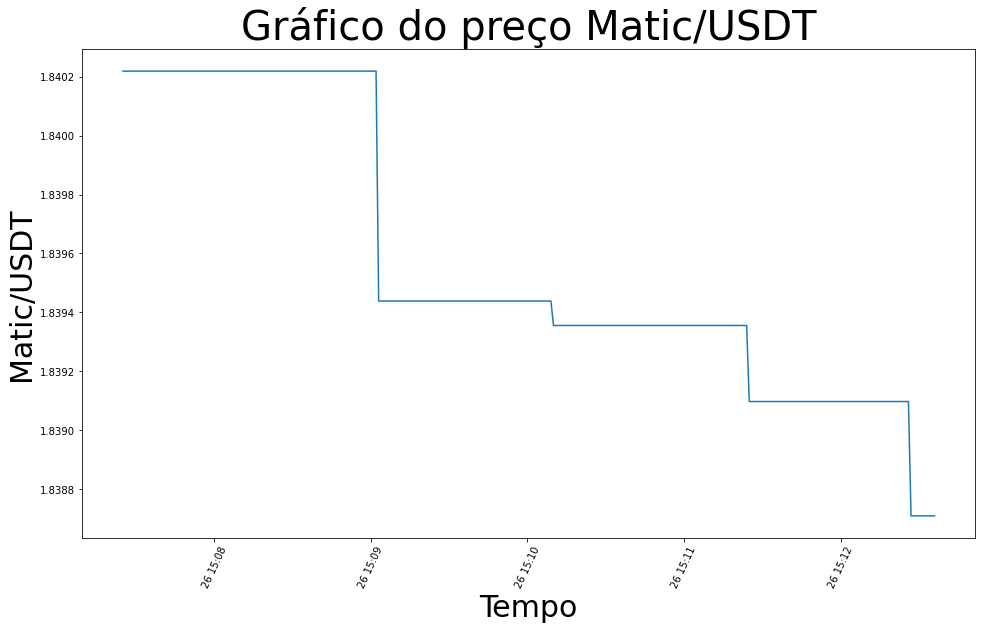

In [10]:
plt.figure(figsize=(16,9))
sns.lineplot(data = df, x='tempo', y ='matic-usd')
plt.xticks(rotation=65)
plt.title('Gráfico do preço Matic/USDT', fontsize=40)
plt.ylabel('Matic/USDT', fontsize=30)
plt.xlabel('Tempo', fontsize=30)
plt.show()

# Essa imagem abaixo é um arquivo png, do gráfico

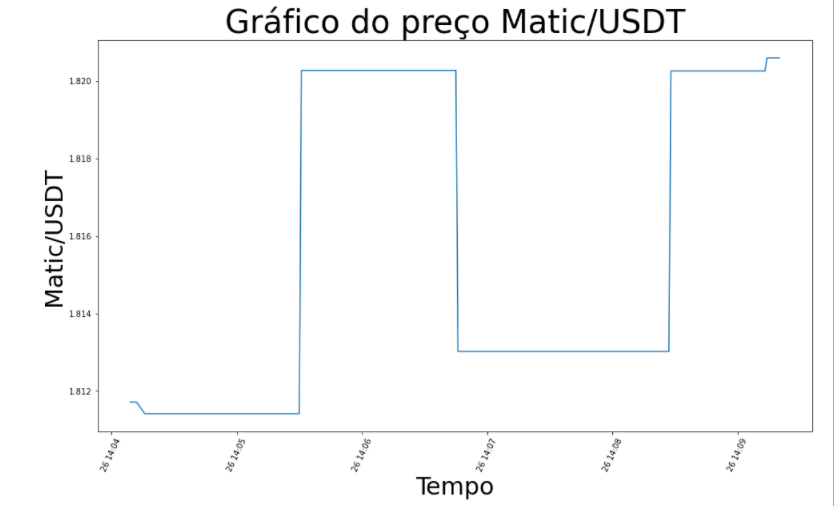
